

## Convolutional Neural Networks

---

In this notebook, we visualize four activation maps in a CNN layer.


### 1. Import the Image

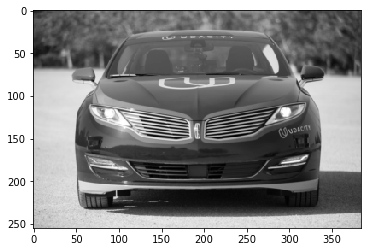

In [1]:
import cv2
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.simplefilter('ignore')

# TODO: Feel free to try out your own images here by changing img_path
# to a file path to another image on your computer!
img_path = '../data/images/udacity_sdc.png'

# load color image 
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
# resize to smaller
small_img = scipy.misc.imresize(gray_img, 0.3)

# rescale entries to lie in [0,1]
small_img = small_img.astype("float32")/255

# plot image
plt.imshow(small_img, cmap='gray')
plt.show()

### 2. Specify the Filters

<img src="./img/conv_visualization.gif" alt="Alt text that describes the graphic" title="Title text" />

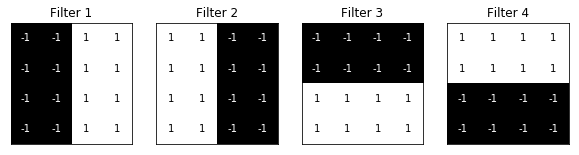

In [2]:
import numpy as np

# TODO: Feel free to modify the numbers here, to try out another filter!
# Please don't change the size of the array ~ :D
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

### do not modify the code below this line ###

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = [filter_1, filter_2, filter_3, filter_4]

# visualize all filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

## Check dimentionality of convolution layer

When using your convolutional layer as the first layer (appearing after the input layer) in a model, you must provide an additional input_shape argument:

- input_shape - Tuple specifying the height, width, and depth (in that order) of the input.

> Do not include the input_shape argument if the convolutional layer is not the first layer in your network.

Just as with neural networks, we create a CNN in Keras by first creating a Sequential model.

We add layers to the network by using the .add() method.
We will not train this CNN; instead, we'll use the executable to study how the dimensionality of the convolutional layer changes, as a function of the supplied arguments.

Take note of how the number of parameters in the convolutional layer changes. Also notice how the shape of the convolutional layer changes.

In the example below, None corresponds to the batch size, and the convolutional layer has a height of 64, width of 64, and depth of 32.

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', 
    activation='relu', input_shape=(128, 128, 3)))
model.summary()

# Param:
# The last 3 is depth of the previous layer, which is the input_shape!
# (32 x 3 x 3 x 3) + 32 = 896.

# the depth of the convolutional layer:
# The depth of a convolutional layer is always equal to the number of filters
# which is 32 in this case.

# What is the width of the convolutional layer?
# 64

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


## Dimensionality

<img src="./img/formula_numer-of-parameter.png" alt="Alt text that describes the graphic" title="Title text" />
<img src="./img/formula_shape-of-convolutional-layer.png" alt="Alt text that describes the graphic" title="Title text" />

## Check Dimentionality of MaxPool Layer 

<img src="./img/maxpool.jpeg" alt="Alt text that describes the graphic" title="Title text" />


### Arguments
You must include the following argument:

- pool_size - Number specifying the height and width of the pooling window.
There are some additional, optional arguments that you might like to tune:

- strides - The vertical and horizontal stride. If you don't specify anything, strides will default to pool_size.
- padding - One of 'valid' or 'same'. If you don't specify anything, padding is set to 'valid'.

NOTE: It is possible to represent both pool_size and strides as either a number or a tuple.

>Optional Resource
Check out the Keras [documentation](https://keras.io/layers/pooling/) on different types of pooling layers!

In [4]:
from keras.models import Sequential
from keras.layers import MaxPooling2D

model = Sequential()
model.add(MaxPooling2D(pool_size=2, strides=2, input_shape=(100, 100, 15)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 15)        0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


## CNN for Image Classifications 

<img src="./img/con_maxpool.gif" alt="Alt text that describes the graphic" title="Title text" />

The network begins with a sequence of three convolutional layers, followed by max pooling layers. These first six layers are designed to take the input array of image pixels and convert it to an array where all of the spatial information has been squeezed out, and only information encoding the content of the image remains. 

The array is then flattened to a vector in the seventh layer of the CNN. It is followed by two dense layers designed to further elucidate the content of the image. The final layer has one entry for each object class in the dataset, and has a softmax activation function, so that it returns probabilities.

>### Things to Remember
- Always add a ReLU activation function to the Conv2D layers in your CNN. With the exception of the final layer in the network, Dense layers should also have a ReLU activation function.
- When constructing a network for classification, the final layer in the network should be a Dense layer with a softmax activation function. The number of nodes in the final layer should equal the total number of classes in the dataset.
- If you start to feel discouraged, we recommend that you check out [Andrej Karpathy's](https://lossfunctions.tumblr.com/) tumblr with user-submitted loss functions, corresponding to models that gave their owners some trouble. Recall that the loss is supposed to decrease during training. These plots show very different behavior :).

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

## Add Input layer #1
model.add(Conv2D(filters=16,kernel_size=2, padding='same',activation='relu',input_shape = (32,32,3)))
# Add MaxPool Layer #2
model.add(MaxPooling2D(strides=2,pool_size=2))


# Another Convolution layer #3
model.add(Conv2D(filters=32,kernel_size=2, padding='same',activation='relu'))
# Add MaxPool Layer #4
model.add(MaxPooling2D(strides=2,pool_size=2))

# Another Convolution layer #5
model.add(Conv2D(filters=64,kernel_size=2, padding='same',activation='relu'))
# Add MaxPool Layer #6
model.add(MaxPooling2D(strides=2,pool_size=2))

# Flatten the encoded data for dense layer #6
model.add(Flatten())

# Fully connented layer - Dense layer #7
model.add(Dense(500,activation='relu'))

# Fully connented layer - Output Layer #8
model.add(Dense(10,activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
__________

In [6]:
import datetime
print("Last run on "+datetime.datetime.now().strftime("%d-%b-%Y %H:%M"))

Last run on 07-May-2019 14:57
